In [ ]:
# This lines of code are used to import important libraries for the work to be done.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
# Here, I will load the 2 different data set. The data consist of the training data and the test data which will be used to evaluate the model's perfromance.
# I uploaded the data on my drive and copied the path so it can be easier to use anytime I want to use it
train_data = pd.read_csv('/content/drive/MyDrive/Emergency_vehicle/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Emergency_vehicle/test.csv')

In [ ]:
# To get an overview of what the data looks like
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
# The code below has one major function and that is to add the complete filepaths or locations of the images for both training and test data and save in a new column call filepath
train_data['filepath'] = train_data['image_names'].apply(lambda x: os.path.join(
    "/content/drive/MyDrive/Emergency_vehicle/Emergency_Vehicle_detection/Emergency_Vehicles/train_images", x))
test_data['filepath'] = test_data['image_names'].apply(lambda x: os.path.join(
    "/content/drive/MyDrive/Emergency_vehicle/Emergency_Vehicle_detection/Emergency_Vehicles/test_images", x))



In [ ]:
# Split the training data into training and validation sets
# The training set will be used to train the model, while the validation set
# helps monitor how well the model generalizes to unseen data.
train_data, val_data = train_test_split(train_data, test_size=0.2, stratify=train_data['emergency_or_not'], random_state=42)

# Convert labels to string format for ImageDataGenerator compatibility
train_data['emergency_or_not'] = train_data['emergency_or_not'].astype(str)
val_data['emergency_or_not'] = val_data['emergency_or_not'].astype(str)


In [ ]:
# in the code below, 3 major things are happening and they are:
# Scaling: We shrink all the image colors down to a scale of 0 to 1. This helps the program learn better.
# Training and Validation: We load the images and resize them to 64x64 pixels. We group them in batches of 32 and give each image a label.
# Testing: We prepare a separate set of images for testing, keeping their original order. This helps us see how well the program learned.


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='filepath',
    y_col='emergency_or_not',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    val_data,
    x_col='filepath',
    y_col='emergency_or_not',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col='filepath',
    y_col=None,
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 1316 validated image filenames belonging to 2 classes.
Found 330 validated image filenames belonging to 2 classes.
Found 706 validated image filenames.


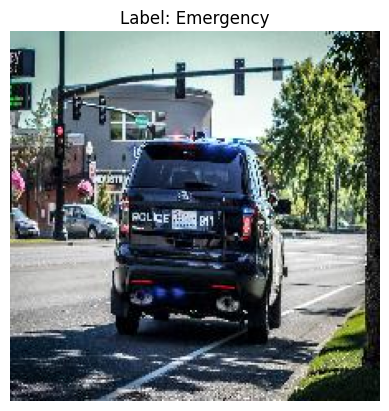

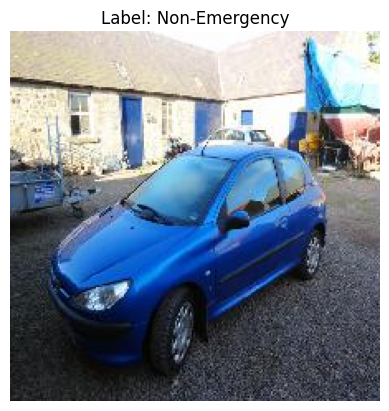

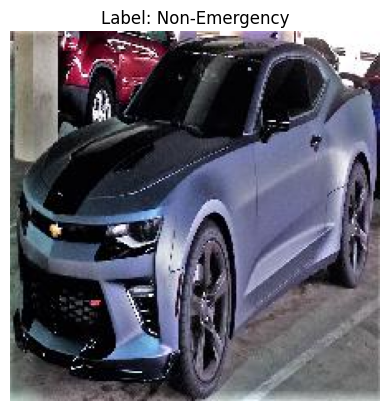

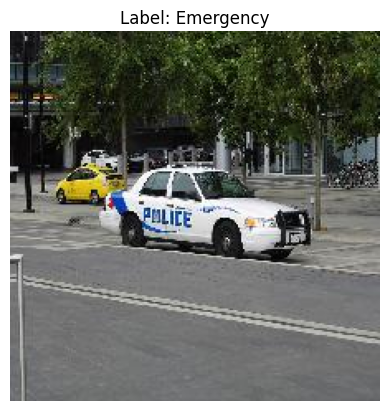

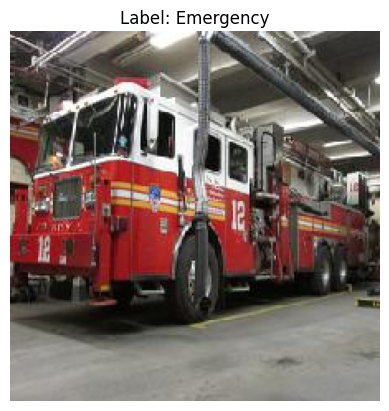

In [ ]:
# before i go deep, i will visualize what each data looks like alongside its label
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the first 5 images with labels
for i in range(5):
    img_path = train_data['filepath'].iloc[i]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(f"Label: {'Emergency' if train_data['emergency_or_not'].iloc[i] == '1' else 'Non-Emergency'}")
    plt.axis('off')
    plt.show()


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Emergency_vehicle/Emergency_Vehicle_detection/Emergency_Vehicles"
train_data['filepath'] = train_data['image_names'].apply(lambda x: os.path.join(BASE_PATH, "train_images", x))
test_data['filepath'] = test_data['image_names'].apply(lambda x: os.path.join(BASE_PATH, "test_images", x))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define the CNN architecture
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to reduce overfitting

    # Output Layer for Binary Classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']        )

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# - Epochs: The number of times the model sees the entire training dataset.
# - Batch size: Controls how many images are processed at once.
# - Early stopping: Stops training when the validation loss stops improving, to prevent overfitting.
# Instantiate EarlyStopping with desired configuration
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 508s 11s/step - accuracy: 0.5705 - loss: 0.6941 - val_accuracy: 0.6242 - val_loss: 0.6546
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 371ms/step - accuracy: 0.6909 - loss: 0.6114 - val_accuracy: 0.7152 - val_loss: 0.5580
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.7524 - loss: 0.5020 - val_accuracy: 0.7515 - val_loss: 0.5239
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 365ms/step - accuracy: 0.7677 - loss: 0.4908 - val_accuracy: 0.7515 - val_loss: 0.4868
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.8009 - loss: 0.4425 - val_accuracy: 0.7576 - val_loss: 0.4785
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.8251 - loss: 0.4032 - val_accuracy: 0.7879 - val_lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


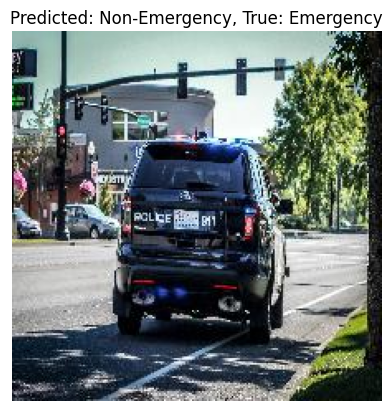

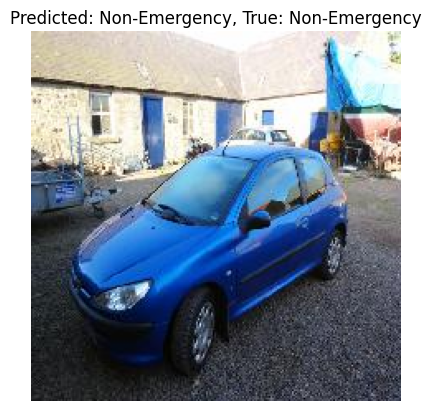

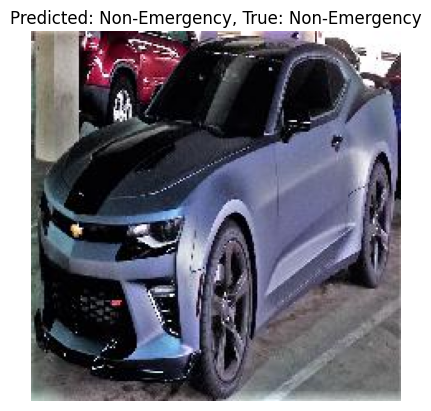

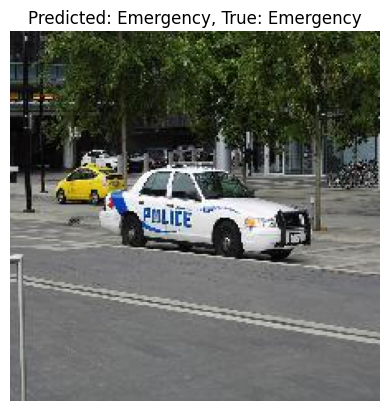

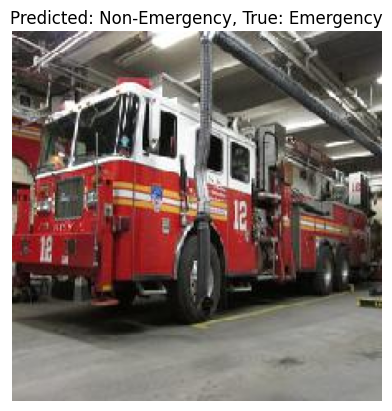

In [ ]:
# Here, I will display the predicted vs the actual after training the model. Just to see the performance of the machine

# Predict on the first 5 images from the training set
predictions = model.predict(train_generator, steps=5)

# Display the first 5 images with predicted labels
for i in range(5):
    img_path = train_data['filepath'].iloc[i]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    predicted_label = "Emergency" if predictions[i] > 0.5 else "Non-Emergency"
    true_label = "Emergency" if train_data['emergency_or_not'].iloc[i] == '1' else "Non-Emergency"
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()